# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-07-10 15:14:15.201431: Importing os...
2025-07-10 15:14:15.201681: Importing sys...
Visible devices: [0]
2025-07-10 15:14:15.201914: Importing timer from timeit...
2025-07-10 15:14:15.201983: Setting env variables for tf import (only device(s) [0] will be available)...
2025-07-10 15:14:15.202106: Importing numpy...
2025-07-10 15:14:15.309484: Importing matplotlib...
2025-07-10 15:14:15.674553: Importing h5py...
2025-07-10 15:14:15.708538: Importing importlib.util...
2025-07-10 15:14:15.708635: Importing json...
2025-07-10 15:14:15.708697: Importing pandas...
2025-07-10 15:14:16.172772: Importing random...
2025-07-10 15:14:16.172907: Importing scipy utils...
2025-07-10 15:14:16.686514: Importing subprocess...
2025-07-10 15:14:16.686693: Importing textwrap...
2025-07-10 15:14:16.686755: Importing tensorflow...
Tensorflow version: 2.16.1
2025-07-10 15:14:20.914235: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-07-10 15:14:22.485191: Importing timeit.

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-07-10 15:14:29.341227: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2025-07-10 15:14:29.370492: All done.


# Model definition

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/jet_features/"

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '20K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")

jet_features_reduced = get_reduced_jet_features(jet_features)

mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)
    
dataset = preprocess_data(jet_features_reduced, mean, std)

Directory results/jet_features/tests/20K_preprocessed/ already exists


## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/jet_features/tests/20K_preprocessed/null_hypotheses/ already exists


In [10]:
niter_tot = 24
batch_size_test = 20_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 4, nbootstrap: 6
Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [11]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 4.2


## Lambda Times

In [12]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 2000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
lam value for NPLMMetric_4 is: 1e-10
lam value for NPLMMetric_5 is: 1e-11
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc1e96609d0>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc1e9697b90>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc05ea8c510>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc05ec33e10>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc05ec59850>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fc05ec5ac10>}


In [13]:
name = "nplm"
file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

    for i in range(len(lam_list)):
        print(f"For lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i]} s.")
        
else:
    results = []
    metric_values = np.zeros((len(lam_list), niter))
    null_hp_times = np.zeros(len(lam_list))  

    
    for i in range(len(lam_list)):
        start = timer()
        print(f"Computing and saving {name} for λ = {lam_list[i]}")
        print("\n===========================================================")

        all_test_statistics = []  # Temporary list to collect statistics for this lambda
        
        for j in range(nbootstrap):  # Loop over all bootstrap iterations
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed=1000 * j + j)  # Shuffle dataset for null hypothesis
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
            print(f"Testing from {j * niter} to {(j + 1) * niter} of {niter * nbootstrap} samples.")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            del dstmp

            # Collect test statistics from this bootstrap iteration
            stats = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values[:niter]
            assert len(stats) == niter, "Unexpected number of test statistics values returned."
            all_test_statistics.append(stats)

        # Flatten the list of statistics into a single array
        all_test_statistics = np.concatenate(all_test_statistics)
        assert len(all_test_statistics) == niter * nbootstrap, "Incorrect total number of test statistics collected."

        end = timer()
        print(f"All done for λ = {lam_list[i]} in: {end - start:.2f} s.")
        null_hp_times[i] = end - start  # Save the time for this M
        results.append({
            "lambda": lam_list[i],
            "computing_time": null_hp_times[i],
            "metric_list": all_test_statistics.tolist()  # Save as a list for JSON serialization
        })

    # Save results to file
    with open(file, "w") as f:
        json.dump(results, f, indent=4)

File results/jet_features/tests/20K_preprocessed/null_hypotheses/Computing_time_vs_lambda.json already exists. Loading existing results.
For lambda = 1e-06, the null hypothesis for 4 points has been calculated in 34.63621570216492 s.
For lambda = 1e-07, the null hypothesis for 4 points has been calculated in 54.647461229003966 s.
For lambda = 1e-08, the null hypothesis for 4 points has been calculated in 109.54980392474681 s.
For lambda = 1e-09, the null hypothesis for 4 points has been calculated in 272.17183729680255 s.
For lambda = 1e-10, the null hypothesis for 4 points has been calculated in 852.4209095607512 s.
For lambda = 1e-11, the null hypothesis for 4 points has been calculated in 3142.7693558139727 s.


File results/jet_features/tests/20K_preprocessed/null_hypotheses/Computing_time_vs_lambda.json already exists. Loading existing results.
[  1.44317565   2.27697755   4.56457516  11.34049322  35.5175379
 130.94872316]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


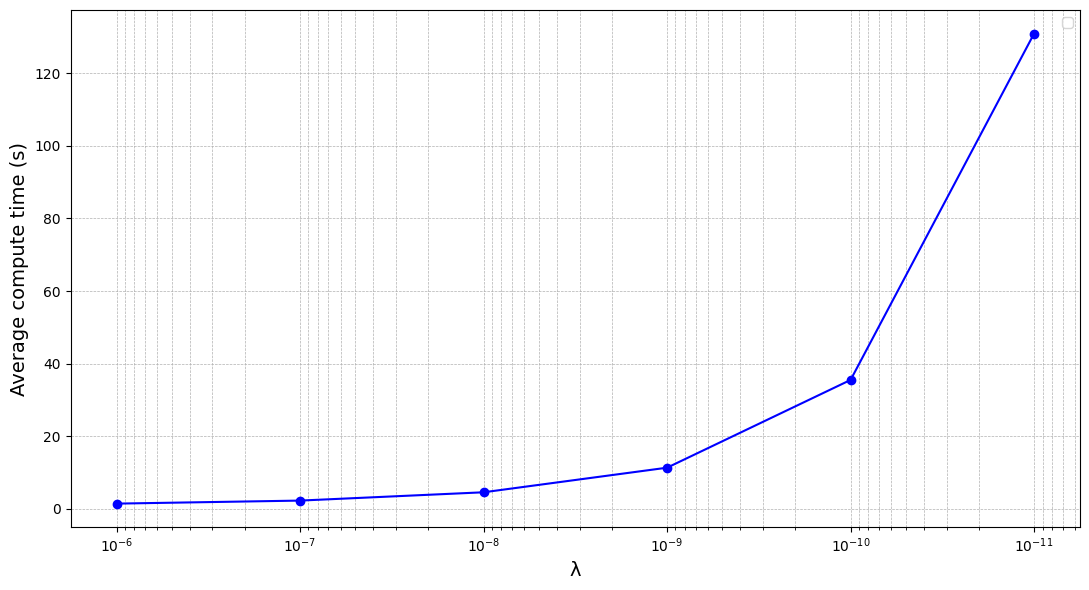

In [14]:
file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

else:
    print("The files does not exists.")

null_hp_times_per_point = null_hp_times/(niter*nbootstrap)
print(null_hp_times_per_point)

plt.figure(figsize=(11, 6))
plt.plot(lam_list, null_hp_times_per_point, marker='o', linestyle='-', color = 'b')

plt.xscale('log')  
plt.xlabel("λ", fontsize=14)
plt.ylabel("Average compute time (s)", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Computing_time_vs_lambda.pdf", format="pdf")
plt.show()  

# Look times for fixed lambda and different M

In [15]:
lam_list = [1e-7, 1e-8, 1e-9]
M_list = [500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

nplm_objects_M_lam = {}

for i, lam_value in enumerate(lam_list):
    for j, M_value in enumerate(M_list):
        nplm_objects_M_lam[f"NPLMMetric_{i,j}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                                progress_bar = True,
                                                verbose = True,
                                                M = M_value, 
                                                lam = lam_value, 
                                                iter_list = 1000000,
                                                flk_sigma = flk_sigma,
                                                weight = 1)
        print(f"(M,lam) values for NPLMMetric_{i,j} are: ({nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('M')},{nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('lam')})")

print(nplm_objects_M_lam)

(M,lam) values for NPLMMetric_(0, 0) are: (500,1e-07)
(M,lam) values for NPLMMetric_(0, 1) are: (750,1e-07)
(M,lam) values for NPLMMetric_(0, 2) are: (1000,1e-07)
(M,lam) values for NPLMMetric_(0, 3) are: (2000,1e-07)
(M,lam) values for NPLMMetric_(0, 4) are: (3000,1e-07)
(M,lam) values for NPLMMetric_(0, 5) are: (4000,1e-07)
(M,lam) values for NPLMMetric_(0, 6) are: (5000,1e-07)
(M,lam) values for NPLMMetric_(0, 7) are: (6000,1e-07)
(M,lam) values for NPLMMetric_(0, 8) are: (7000,1e-07)
(M,lam) values for NPLMMetric_(0, 9) are: (8000,1e-07)
(M,lam) values for NPLMMetric_(0, 10) are: (9000,1e-07)
(M,lam) values for NPLMMetric_(0, 11) are: (10000,1e-07)
(M,lam) values for NPLMMetric_(0, 12) are: (11000,1e-07)
(M,lam) values for NPLMMetric_(0, 13) are: (12000,1e-07)
(M,lam) values for NPLMMetric_(0, 14) are: (13000,1e-07)
(M,lam) values for NPLMMetric_(0, 15) are: (14000,1e-07)
(M,lam) values for NPLMMetric_(0, 16) are: (15000,1e-07)
(M,lam) values for NPLMMetric_(0, 17) are: (16000,1e-0

In [16]:
name = "nplm"
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
    
    for i in range(len(lam_list)):       
        for j in range(len(M_list)):
            print(f"For λ={lam_list[i]} and M = {M_list[j]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i,j]} s.")
        
else:
    results = []
    metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))
    null_hp_times = np.zeros((len(lam_list), len(M_list)))   

    for i in range(len(lam_list)):
        results.append({"lam": {}})
        
        for j in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            print("\n===========================================================")

            all_test_statistics = []  # Temporary list to collect statistics for this lambda
            
            for k in range(nbootstrap):  # Loop over all bootstrap iterations
                l = len(dataset) // 2
                dstmp = shuffle_dataset(seed=1000 * k + k)  # Shuffle dataset for null hypothesis
                dist_1_null = tf.cast(dstmp[:l], tf.float64)
                dist_2_null = tf.cast(dstmp[l:], tf.float64)
                TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
                TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
                print(f"Testing from {k * niter} to {(k + 1) * niter} of {niter * nbootstrap} samples.")
                nplm_objects_M_lam[f"NPLMMetric_{i,j}"].Test_np()
                del dstmp

                # Collect test statistics from this bootstrap iteration
                stats = nplm_objects_M_lam[f"NPLMMetric_{i,j}"].test_statistics_values[:niter]
                assert len(stats) == niter, "Unexpected number of test statistics values returned."
                all_test_statistics.append(stats)

            # Flatten the list of statistics into a single array
            all_test_statistics = np.concatenate(all_test_statistics)
            assert len(all_test_statistics) == niter * nbootstrap, "Incorrect total number of test statistics collected."

            end = timer()
            print(f"All done for λ = {lam_list[i]} in: {end - start:.2f} s.")
            null_hp_times[i,j] = end - start  # Save the time for this M
            metric_values[i, j] = all_test_statistics
            
            if lam_list[i] not in results[i]["lam"]:
                results[i]["lam"][lam_list[i]] = [] 
            
            # Append the new data for the current M value
            results[i]["lam"][lam_list[i]].append({
                "M": M_list[j],
                "computing_time": null_hp_times[i, j],
                "metric_list": metric_values[i, j].tolist()
            })

    # Save results to file
    with open(file, "w") as f:
        json.dump(results, f, indent=4)

File results/jet_features/tests/20K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.
For λ=1e-07 and M = 500, the null hypothesis for 4 points has been calculated in 62.889928182121366 s.
For λ=1e-07 and M = 750, the null hypothesis for 4 points has been calculated in 53.46700503816828 s.
For λ=1e-07 and M = 1000, the null hypothesis for 4 points has been calculated in 47.687544950284064 s.
For λ=1e-07 and M = 2000, the null hypothesis for 4 points has been calculated in 42.31619121786207 s.
For λ=1e-07 and M = 3000, the null hypothesis for 4 points has been calculated in 44.250786213204265 s.
For λ=1e-07 and M = 4000, the null hypothesis for 4 points has been calculated in 44.86470318492502 s.
For λ=1e-07 and M = 5000, the null hypothesis for 4 points has been calculated in 46.79085969226435 s.
For λ=1e-07 and M = 6000, the null hypothesis for 4 points has been calculated in 54.518905469216406 s.
For λ=1e-07 and M = 7000, the null h

File results/jet_features/tests/20K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.


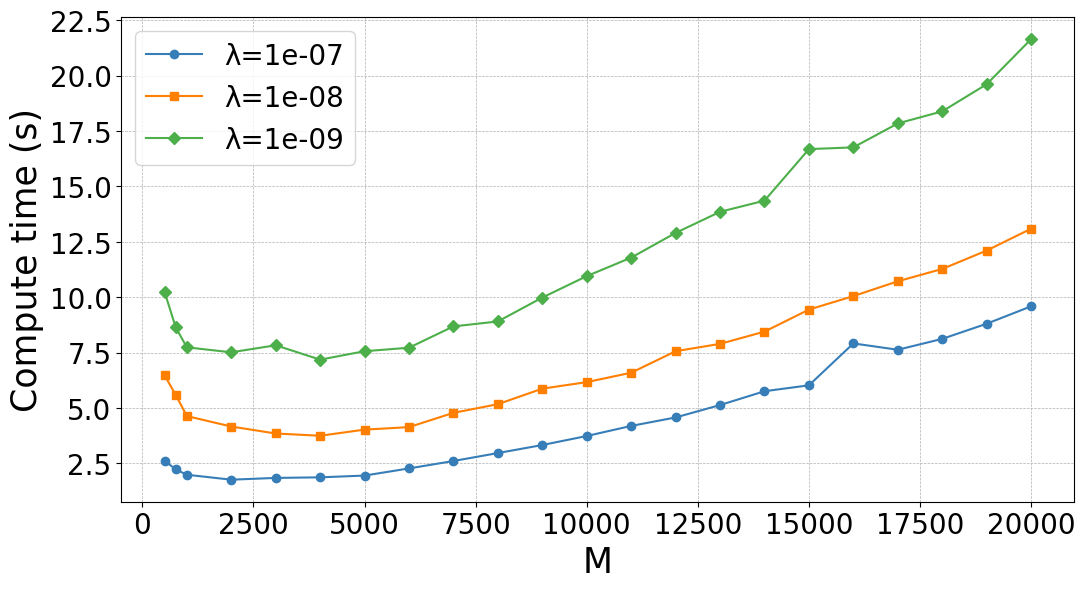

In [17]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ["#377eb8", "#ff7f00", "#4daf4a"]
marker_list = ['o', 's', 'D']
label_list = [f'λ={lam}' for lam in lam_list]


plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, null_hp_times[i]/(niter*nbootstrap),  capsize=5 ,marker=marker_list[i], linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=25)
plt.ylabel("Compute time (s)", fontsize=25)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()


plt.savefig(null_hypotheses_dir+"Computing_time_vs_M.pdf", format="pdf")
plt.show()


File results/jet_features/tests/20K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.
Average test statistic values for lambda = 1e-07 varying M: [131.36554278 132.15895382 132.38010339 133.16140155 133.3513386
 133.5026187  133.59437372 133.65397619 133.7012879  133.73428694
 133.73236301 133.75919153 133.76071645 133.76334408 133.78627299
 133.80304749 133.80641019 133.78411766 133.77765178 133.79627143
 133.79264077 133.79102114]
 with std: [24.50227033 24.4304901  24.57294537 24.76343558 24.7463826  24.74279914
 24.76642593 24.736449   24.77299383 24.76572515 24.78342378 24.78745152
 24.77266703 24.77379257 24.77972148 24.80643895 24.79510532 24.7905069
 24.7881097  24.80487973 24.80796624 24.81152629]
Average test statistic values for lambda = 1e-08 varying M: [180.23710702 182.01441255 182.76572379 184.32342942 184.86096332
 185.2184138  185.39642124 185.52521258 185.66205403 185.69532438
 185.76117343 185.81057458 185.83640948 

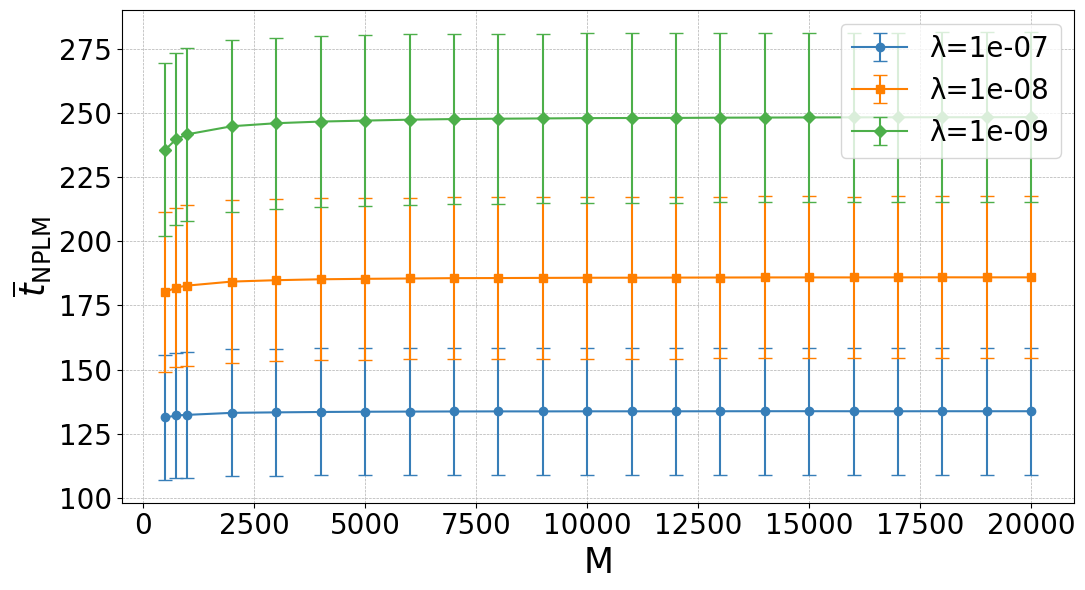

In [18]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ["#377eb8", "#ff7f00", "#4daf4a"]
marker_list = ['o', 's', 'D']
label_list = [f'λ={lam}' for lam in lam_list]

avg_test_stat = np.zeros((len(lam_list), len(M_list)))
std_test_stat = np.zeros((len(lam_list), len(M_list)))

for i, lam in enumerate(lam_list):
    for j, m in enumerate(M_list):
        avg_test_stat[i,j] = (np.mean(metric_values[i,j]))
        std_test_stat[i,j] = (np.std(metric_values[i,j]))
    print(f"Average test statistic values for lambda = {lam} varying M: {avg_test_stat[i]}\n"
          f" with std: {std_test_stat[i]}")

plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, avg_test_stat[i], std_test_stat[i], capsize=5 ,marker=marker_list[i], linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=25)
plt.ylabel(r"$\overline{t}_{\mathrm{NPLM}}$", fontsize=25)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()


plt.savefig(null_hypotheses_dir+"Test_statistic_fluc_vs_M.pdf", format="pdf")
plt.show()
